# HEART DATASETS ANALYSIS

In this notebook, we will work on the Heart Disease UCI dataset. The objective is to build a classifier able to predict a heart disease problem thanks to 13 others features. Several model are trained, the random forest classifier giving the best results.

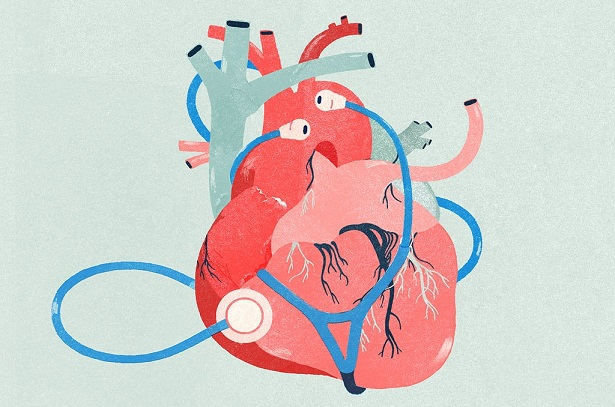

### 1 : Libraries import

In [19]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

### 2 : Dataset reading and printing

In [20]:
data = pd.read_csv('heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### 3 : Datasets partition into explicatives variables and explained variable

In [22]:
Y = data['target'].copy()
del data['target']
X = data.copy()

### 4 : Data preprocessing

In [23]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

### 5 : Models listing and training with choice of hyperparameters

In [24]:
models_param_grid = [
    {'classifier' : LogisticRegression(), 'hyper_param' : {'C' : [0.1, 0.3, 1., 3., 10.]}},
    {'classifier' : RandomForestClassifier(), 'hyper_param' : {'n_estimators' : [5, 10, 20, 30], 'max_depth' : [3, 5, 7, 10,]}},
    {'classifier' : SVC(), 'hyper_param' : {'C': [0.1, 0.3, 1., 3., 10.], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['linear', 'rbf', 'poly']}}]

listes_best_clf = list()

for i in range(len(models_param_grid)):
    clf = GridSearchCV(models_param_grid[i]['classifier'], param_grid = models_param_grid[i]['hyper_param'], cv = 5)
    best_clf = clf.fit(X, Y)
    listes_best_clf.append(best_clf.best_estimator_)
    print(str(listes_best_clf[i]) + '\n')
    print(listes_best_clf[i].get_params())
    print('Mean accuracy : ', listes_best_clf[i].score(X, Y), '\n\n')
    

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Mean accuracy :  0.858085808580858 


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
         

### 6 : Features relevancy to predict a heart disease

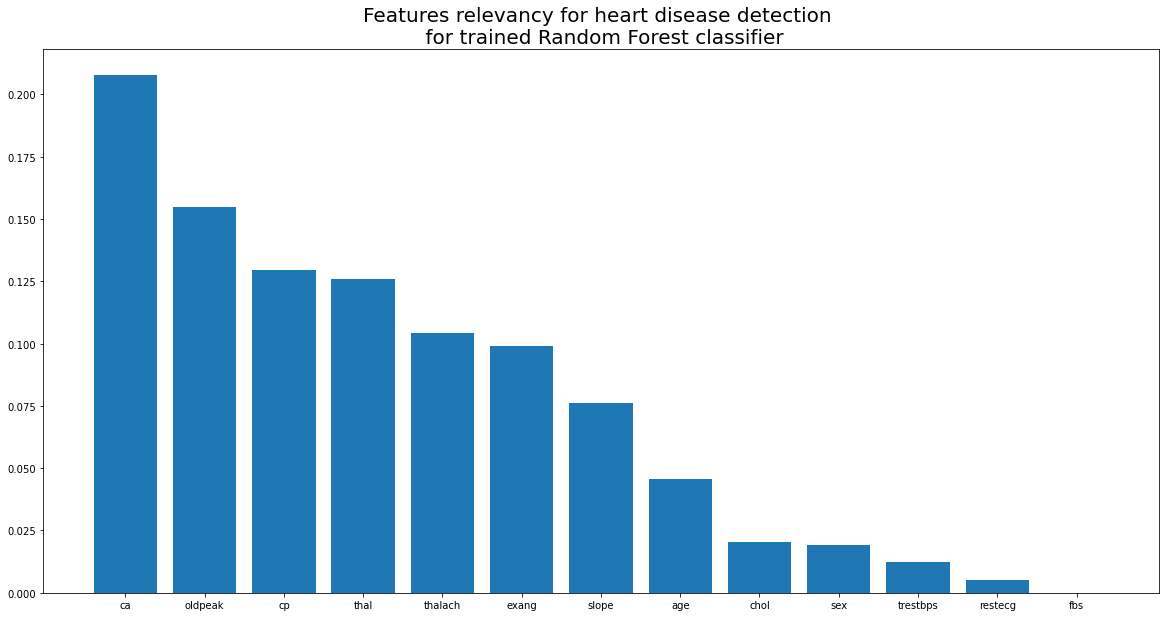

In [26]:
feature_importances = pd.DataFrame(listes_best_clf[1].feature_importances_, index = X.columns, columns = ['importance']).sort_values('importance', ascending = False)
plt.figure(figsize = (20, 10))
plt.title('Features relevancy for heart disease detection \n for trained Random Forest classifier', fontsize = 20)
plt.bar([x for x in range(len(feature_importances['importance']))], feature_importances['importance'], tick_label = feature_importances.index)
plt.show()